In [1]:
#connecting Google Drive with Google colab
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
#Importing essential libraries
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Restaurant_Reviews.tsv',delimiter='\t',quoting=3)


In [4]:
#shape
data.shape

(1000, 2)

In [5]:
#return the label of each column in the dataframe
data.columns

Index(['Review', 'Liked'], dtype='object')

In [6]:
#view the data
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [7]:
#Information about the dataframe
data.info

<bound method DataFrame.info of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

In [8]:
#importing essential libraries for performing natural language processing
import nltk #natural lanaguage toolkit is a python package that can use for nlp
import re #python has a built in package re,which can be ued to work with regular expression
nltk.download('stopwords')  #the NLTK corpus is a massive dump of all kinds of natural language data set that are definitely worth taking a look at
from nltk.corpus import stopwords #Stopwords is commonly used as the a an in that a search engine has been programmed to ignore
from nltk.stem.porter import PorterStemmer # it is type of stemmer is mainly known for data mining and information retriveral


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
#cleaning the reviews
corpus=[]
for i in range (0,1000): #1000 records

#cleaning special character from the reviews
#the re.sub()method performs the global search and global replace on the given string
    review = re.sub(pattern='[^a-zA-z]',repl= ' ',string=data['Review'][i])

#converting the entire review into lower case
review =review.lower()

#tokenizing the review by words
review_words = review.split()

#Removing the stop words
review_words=[word for word in review_words if not word in set (stopwords.words('english'))]

#stemming the words
ps =PorterStemmer()
review =[ps.stem(word) for word in review_words]

#joining the stemmed words
revie =' '.join(review)

#creating a corpus
corpus.append(review)



In [10]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', data['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = data.iloc[:, 1].values

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [13]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 1500), (200, 1500), (800,), (200,))

# multinomial navie bayes: the algorithm is probabilistic learning method is mostly used in NLP algorithm is based on the bayes theorm and predicts the tag of a text such as a piece of email or newapaper


In [14]:
#fitting navie bayes to the training set
from sklearn.naive_bayes import MultinomialNB
#the multinomial Navie Bayes Classifier is Suitable for Classification with discrete features(eg. word counts for text classification)

classifier = MultinomialNB()
classifier.fit(X_train,y_train)


MultinomialNB()

In [15]:
#  predicting the test set results
y_pred =classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1])

In [16]:
#Accuracy , precision and Recall
from sklearn.metrics import accuracy_score
#in python the accuracy_score function of the sklearn.metrics package calculate the accuracy score for a set of predicted labels against the true labels.
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3 = recall_score(y_test,y_pred)

print("-----Scores------")
print("Accuracy score is:{}%".format(round(score1*100,2)))
print("Precision score is:{}%".format(round(score2*100,2)))
print("recall score is:{}%".format(round(score3*100,2)))

-----Scores------
Accuracy score is:76.5%
Precision score is:76.42%
recall score is:78.64%


In [17]:
#Making the confusion Matrix
#A confusion Matrix  is a table that is used to define the performance of a classification algorithm
#A confusion matrix visualizes and summarizes the performance of a classification
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)


In [18]:
cm


array([[72, 25],
       [22, 81]])

Text(95.72222222222221, 0.5, 'Actual values')

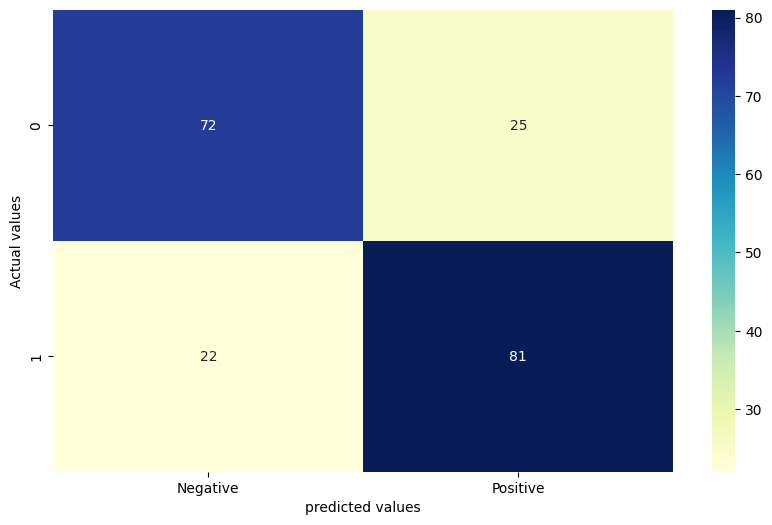

In [19]:
from ast import increment_lineno
#plotting the confusion matrix
import  matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize =(10,6))
sns.heatmap(cm, annot=True,cmap="YlGnBu",xticklabels=['Negative','Positive'])
plt.xlabel('predicted values')
plt.ylabel('Actual values')

In [25]:
#Hyperparameter tuning the Nvie Bayes Classifier
best_accuracy =0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train,y_train)
  temp_y_pred=temp_classifier.predict(X_test)
  score= accuracy_score(y_test,temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1),round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
    print('-----------------------------------')
    print('The best accuracy is {}% with alpha value as{}'.format(round(best_accuracy*100,2),round(alpha_val,1)))


Accuracy score for alpha=0.1 is: 78.0%
-----------------------------------
The best accuracy is 78.0% with alpha value as0.1
Accuracy score for alpha=0.2 is: 78.5%
-----------------------------------
The best accuracy is 78.5% with alpha value as0.2
Accuracy score for alpha=0.3 is: 78.0%
Accuracy score for alpha=0.4 is: 78.0%
Accuracy score for alpha=0.5 is: 77.5%
Accuracy score for alpha=0.6 is: 77.5%
Accuracy score for alpha=0.7 is: 77.5%
Accuracy score for alpha=0.8 is: 77.0%
Accuracy score for alpha=0.9 is: 76.5%
Accuracy score for alpha=1.0 is: 76.5%


In [27]:
classifier = MultinomialNB(alpha=0.2)
classifier.fit(X_train,y_train)

MultinomialNB(alpha=0.2)

In [33]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern='[^a-zA-Z]',repl ='',string =sample_review)
  sample_review = sample_review.lower()
  sample_review_words =sample_review.split()
  sample_review_words =[word for word in sample_review_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_review =[ps.stem(word) for word in sample_review_words]
  final_review=''.join(final_review)
  temp =cv.transform([final_review]).toarray()
  return classifier.predict(temp)

In [35]:
#predicting values
sample_review ='The food really bad.'
if predict_sentiment(sample_review):
  print('This is a Positive review.')
else:
  print('This is a Negative review!')

This is a Negative review!
